In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation, rc
from IPython.display import HTML
from datetime import date,timedelta
import datetime
import glob
import sys
sys.path.insert(0,'/wrk/simon/scripts/python/functions/')
from aermod import utm2lonlat, plottw, plotboarders
%load_ext autoreload
%matplotlib inline 

In [2]:
spcnm='BENZENE'
grdnm='YULIN1'
emscen=''.join(['teds_',grdnm])

In [3]:
ddir1=''.join(['/archives/utils/SMOKE/data/run_',emscen,'/output/merge/'])
dfile=''.join([ddir1,'egts_l.20140101.14.',emscen,'.ncf'])
nc=Dataset(dfile,'r')
emis=nc.variables[spcnm][:].copy()
tin=nc.variables['TFLAG'][:].copy()
xc=nc.XCENT
yc=nc.YCENT
dx0c=nc.XORIG
dy0c=nc.YORIG
dx=nc.XCELL
dy=nc.YCELL
#nx=tfile.NCOLSI
#ny=tfile.NROWS
[nt,nz,ny,nx]=emis.shape
nc.close()
m=Basemap(projection='lcc',lon_0=xc,lat_0=yc,llcrnrlon=xc+dx0c/1e5, \
urcrnrlon=xc+(dx0c+nx*dx)/1e5,llcrnrlat=yc+dy0c/1e5, \
urcrnrlat=yc+(dy0c+ny*dy)/1e5,resolution='c')
x1c,y1c=m(xc,yc)
xs=np.arange(x1c+dx0c,x1c+dx0c+nx*dx,dx)
ys=np.arange(y1c+dy0c,y1c+dy0c+ny*dy,dy)
#m.urcrnrx=xs.max();m.urcrnry=ys.max();m.llcrnrx=xs.min();m.llcrnry=ys.min()
xr,yr=m([119.5,121],[23.2,24.2])
m.urcrnrx=xr[1];m.urcrnry=yr[1];m.llcrnrx=xr[0];m.llcrnry=yr[0]

In [4]:
tt=0
#data=emis[tt,:,:,:].copy()
data=np.sum(emis,axis=1)
zz=data[0,:,:]
tnow=tin[tt,0,:]
tnow=datetime.datetime(int(tnow[0]/1e3),1,1)+timedelta(days=int(tnow[0]-int(tnow[0]/1e3)*1e3-1),hours=int(tnow[1])/1e4)
#zz[zz==0]=np.nan

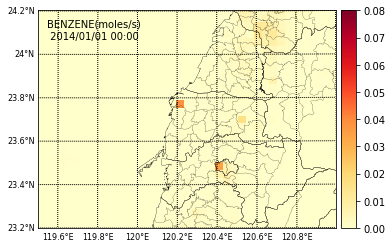

In [5]:
filename='teds9_gridded_emission_map'
fout='png'
cmap=mpl.cm.YlOrRd
#cmap=mpl.cm.jet
#m=plottw([119.5,121,23.2,24.2])
fig=plt.figure()
ax=fig.add_subplot(111)
cs=m.pcolormesh(xs+dx/2,ys+dy/2,zz,vmin=0,vmax=0.08, \
    shading='flat',cmap=cmap)
cb=m.colorbar()
plotboarders(m,ax,lwd1=0.1,lwd2=0.2)
m.drawmeridians(np.arange(100,180,.2),labels=[0,0,0,1],fontsize=8,ax=ax)
m.drawparallels(np.arange(0,40,.2),labels=[1,0,0,0],fontsize=8,ax=ax)
txt=ax.text(0.03,0.87,('{}{}\n {:{dfmt}}'.format(spcnm,'(moles/s)',tnow,dfmt='%Y/%m/%d %H:%M')),transform=ax.transAxes)
#fig.savefig(filename+'.'+fout,rasterized=True,format=fout, \
#                bbox_inches='tight',pad_inches=0.1,dpi=300)

In [6]:
# initialization function: plot the background of each frame
def init():
    cs.set_array([])
    return cs
def animate(iter):
    zz=np.ravel(data[iter,:-1,:-1],order='C')    
    cs.set_array(zz)
    tnow=tin[iter,0,:]
    tnow=datetime.datetime(int(tnow[0]/1e3),1,1)+timedelta(days=int(tnow[0]-int(tnow[0]/1e3)*1e3-1),hours=int(tnow[1])/1e4+8)    
    txt.set_text('{}{}\n {:{dfmt}}'.format(spcnm,'(moles/s)',tnow,dfmt='%Y/%m/%d %H:%M'))
    return cs
anim = animation.FuncAnimation(fig,animate,frames=200,interval=80,blit=False,repeat=False)
HTML(anim.to_html5_video())

In [7]:
grdnm='YULIN3'

In [8]:
ddir1=''.join(['/archives/simon/cmaq_ddm-3d/',grdnm,'/data/out/'])
dfile=''.join([ddir1,'CCTM_ACONC_v52_gcc_2014001_20140101.nc'])
nc=Dataset(dfile,'r')
conc=nc.variables[spcnm][:].copy()
cs.set_clim([0.0,0.8])
def animate(iter):
    zz=np.ravel(data[iter,:-1,:-1],order='C')    
    cs.set_array(zz)
    tnow=tin[iter,0,:]
    tnow=datetime.datetime(int(tnow[0]/1e3),1,1)+timedelta(days=int(tnow[0]-int(tnow[0]/1e3)*1e3-1),hours=int(tnow[1])/1e4+8)    
    txt.set_text('{}{}\n {:{dfmt}}'.format(spcnm,'(ppbv)',tnow,dfmt='%Y/%m/%d %H:%M'))
    return cs
data=conc[:,0,:,:]*1e3
anim=animation.FuncAnimation(fig,animate,frames=200,interval=80,blit=False,repeat=False)
HTML(anim.to_html5_video())

In [9]:
ddir1=''.join(['/archives/simon/cmaq_ddm-3d/',grdnm,'/data/out/'])
dfile=''.join([ddir1,'CCTM_v52.exe.ASENS.v52_gcc_2014001_20140101'])
nc=Dataset(dfile,'r')
sens=nc.variables[''.join([spcnm,'_EMI'])][:].copy()
cs.set_clim([0.0,.7])
def animate(iter):
    zz=np.ravel(data[iter,:-1,:-1],order='C')    
    cs.set_array(zz)
    tnow=tin[iter,0,:]
    tnow=datetime.datetime(int(tnow[0]/1e3),1,1)+timedelta(days=int(tnow[0]-int(tnow[0]/1e3)*1e3-1),hours=int(tnow[1])/1e4+8)    
    txt.set_text('{}{}\n {:{dfmt}}'.format(spcnm,' sensitivity($10^{-3}$)',tnow,dfmt='%Y/%m/%d %H:%M'))
    return cs
data=sens[:,0,:,:]*1e3
anim=animation.FuncAnimation(fig,animate,frames=200,interval=80,blit=False,repeat=False)
HTML(anim.to_html5_video())

In [11]:
from read_twepa import read_epastf, read_epast, get_epatime, get_epadata
scrit='nearest'
stx00,sty00,stnm00,stnm0a0=read_epastf('/archives/data/tw/erdb/airquality_stations.csv')
fpatterns='/archives/data/tw/epa/*/*xls'
df3,stnm3=read_epast(fpatterns)

In [37]:
df3.get_group('三義')

,10,11,12,13,14,15,16,17,18,19,...,02,03,04,05,06,07,08,09,日期,測項
0,20,21,21,21,20,19,19,16,15,14,...,10,10,9.3,9.1,9.1,9.7,13,17,2014/01/01,AMB_TEMP
1,0.27,0.33,0.35,0.38,0.37,0.36,0.41,0.52,0.65,0.52,...,0.39,0.42,0.34,0.34,0.36,0.38,0.34,0.28,2014/01/01,CO
2,1.4,2.1,2.1,2.6,2,1.6,1.4,1.1,1.2,1.2,...,0.8,1.1,1.2,1,1,1.3,1.7,1.3,2014/01/01,NO
3,1.8,5.1,6.9,9.7,10,10,13,15,15,11,...,5.8,9.3,7.2,2.6,1.9,3,4.3,1.6,2014/01/01,NO2
4,3.2,7.1,9,12,12,12,14,16,16,12,...,6.6,10,8.4,3.6,3,4.3,6,2.9,2014/01/01,NOx
5,44,45,50,51,64,66,59,48,35,38,...,36,34,31,33,36,33,36,41,2014/01/01,O3
6,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,2014/01/01,PH_RAIN
7,29,34,43,48,53,60,66,77,84,72,...,53,46,42,35,39,42,35,31,2014/01/01,PM10
8,14,23,28,35,37,36,42,52,56,46,...,36,32,26,26,28,28,28,19,2014/01/01,PM2.5
9,NR,NR,NR,NR,NR,NR,NR,NR,NR,NR,...,NR,NR,NR,NR,NR,NR,NR,NR,2014/01/01,RAINFALL


In [10]:
stx=120.2
sty=23.8
stxi,styi=m(stx,sty)
d3i=np.argmin(np.array((ys-styi)**2))
d4i=np.argmin(np.array((xs-stxi)**2))
d1i,d2i,d3i1,d4i1=np.unravel_index(emis[:,:,d3i-5:d3i+5,d4i-5:d4i+5].argmax(),emis[:,:,d3i-5:d3i+5,d4i-5:d4i+5].shape)
d3i=d3i-5+d3i1
d4i=d4i-5+d4i1
#d1i,d2i,d3i,d4i=np.unravel_index(emis.argmax(),emis.shape)